In [1]:
# Imports
import matplotlib.pyplot as plt

from src.visualisation import color_tools as ct
from src.visualisation import fig_01_clinvar_ascertainment_plots as barplots

Global variables:
 	- C: color palette
 	- cm: cm to inch conversion factor


In [3]:
# Get biorender image files
transcript_diagram = plt.imread("../plots/fig_1_transcript_diagram.png")
constraint_diagram = plt.imread("../plots/fig_1_constraint_diagram.png")

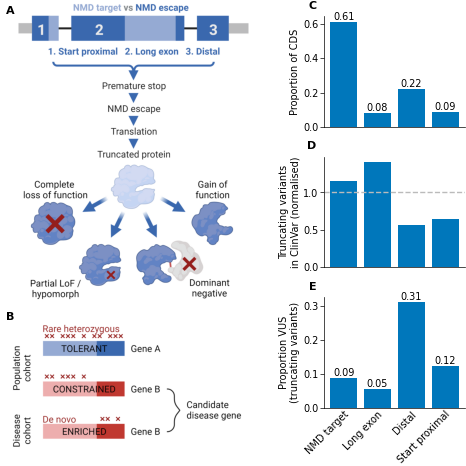

In [4]:
fig = plt.figure(figsize=(12 * cm, 12 * cm), layout="constrained")
subfigs = fig.subfigures(1, 2, width_ratios=(7, 5))

axs_left = subfigs[0].subplots(2, 1, height_ratios=(2, 1))
axs_right = subfigs[1].subplots(3, 1)

# Biorender images (transcript diagram)
axs_left[0].imshow(transcript_diagram)
axs_left[0].axis("off")

# Biorender images (constraint diagram)
axs_left[1].imshow(constraint_diagram)
axs_left[1].axis("off")

# NMD region footprints
plot_clinvar_bars(
    footprint,
    axs_right[0],
    "footprint",
    "Proportion of CDS",
)

# ClinVar ascertainment
plot_clinvar_bars(
    asrtn,
    axs_right[1],
    "prop_norm",
    "Truncating variants\nin ClinVar (normalised)",
    bar_label=False,
    axhline=1,
)

# ClinVar proportion VUS
plot_clinvar_bars(
    clin_vus,
    axs_right[2],
    "proportion",
    "Proportion VUS\n(truncating variants)",
    xticks=True,
)

# Panel labels
Axes = [a for a in axs_left] + [a for a in axs_right]
labels = list("ABCDE")
xs = [0.05]*2 + [-0.05]*3
ys = [0.95]*2 + [1.05]*3
for a, s, x, y in zip(Axes, labels, xs, ys):
    panel_label(a,s, x, y)
    
# Save figure
plt.savefig("../plots/fig_01.svg", format="svg")
plt.savefig("../plots/fig_01.png", format="png", dpi=1000)